Task 1: Hypothesis Testing
Objective: Conduct a hypothesis test to determine if there is a significant difference in mean weight between males and females.

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese
Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')
Mean weight for males: 71.07 kg
Mean weight for females: 47.02 kg


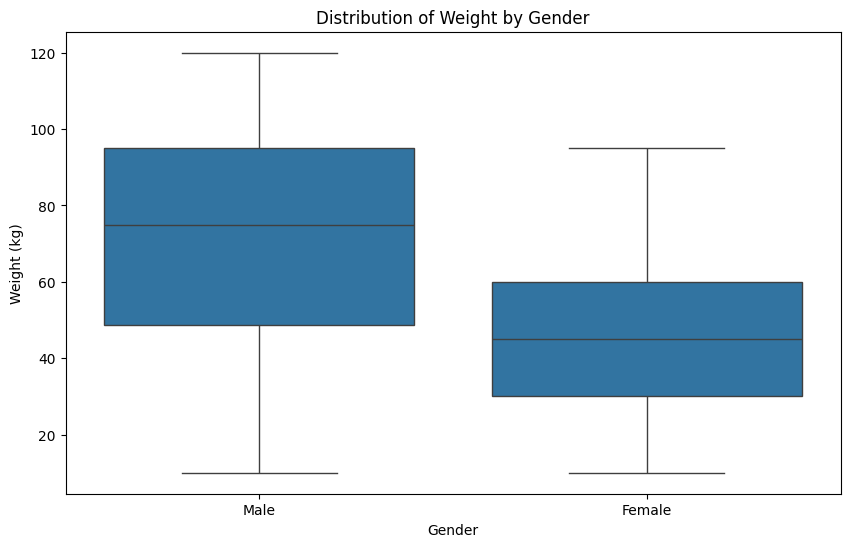

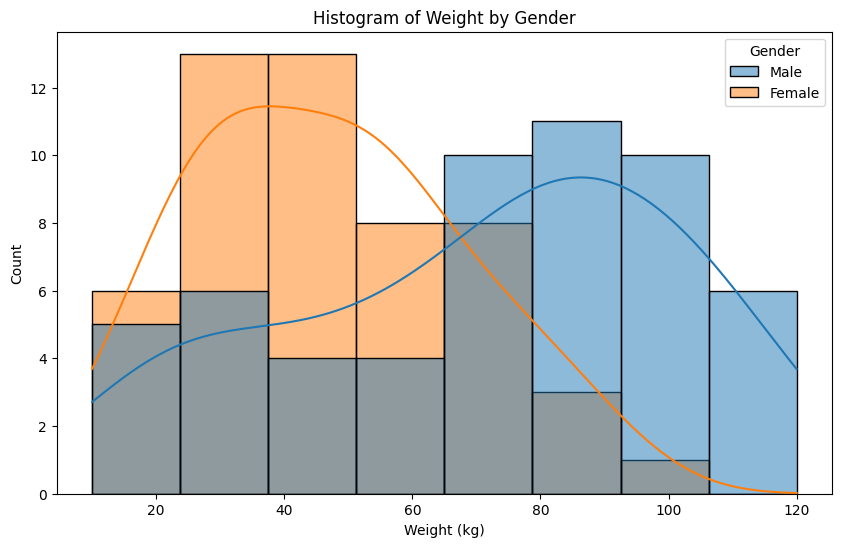

T-statistic: 4.7430
P-value: 0.0000
Reject null hypothesis: There is a significant difference in mean weight between males and females.


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset

df = pd.read_csv('Obesity Classification.csv')

# Display first few rows and column names to understand the structure
print(df.head())
print(df.columns)

# Data exploration and hypothesis testing
# Separate data into males and females
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']

# Summary statistics
male_mean_weight = males['Weight'].mean()
female_mean_weight = females['Weight'].mean()

print(f"Mean weight for males: {male_mean_weight:.2f} kg")
print(f"Mean weight for females: {female_mean_weight:.2f} kg")

# Visualizations (box plot and histogram)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Weight', data=df)
plt.title('Distribution of Weight by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight (kg)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weight', hue='Gender', kde=True)
plt.title('Histogram of Weight by Gender')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

# Hypothesis testing (independent samples t-test)
t_statistic, p_value = stats.ttest_ind(males['Weight'], females['Weight'])

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in mean weight between males and females.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in mean weight between males and females.")


Task 2: Correlation Coefficient
Objective: Calculate the correlation coefficient between height and weight.

Pearson correlation coefficient between Height and Weight: 0.4289


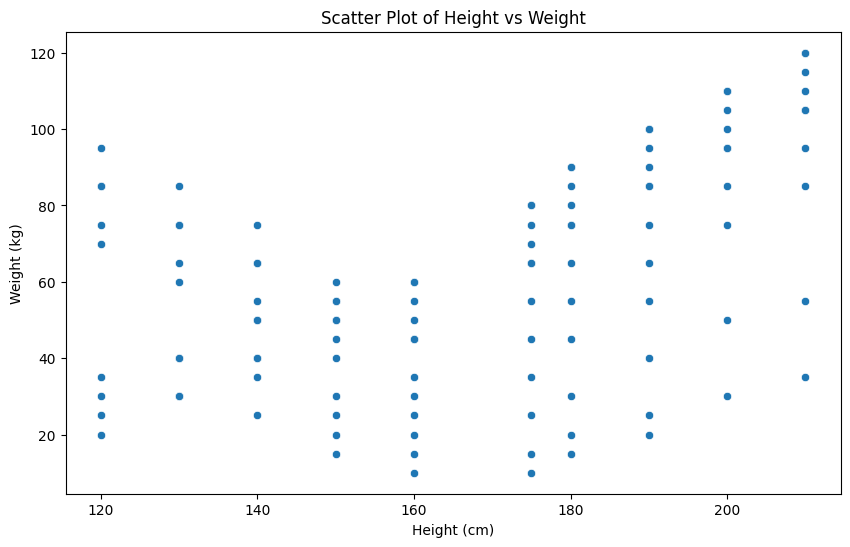

There is a positive correlation between Height and Weight.


In [10]:
# Calculate correlation coefficient between Height and Weight
correlation_coefficient = df['Height'].corr(df['Weight'])

print(f"Pearson correlation coefficient between Height and Weight: {correlation_coefficient:.4f}")

# Visualize the relationship between Height and Weight using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=df)
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# Interpretation of the correlation coefficient
if correlation_coefficient > 0:
    print("There is a positive correlation between Height and Weight.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between Height and Weight.")
else:
    print("There is no linear correlation between Height and Weight.")


Task 3: Linear Regression Model
Objective: Build a linear regression model to predict weight based on height.

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese
Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')
Height    0
Weight    0
dtype: int64
Mean Squared Error: 717.3981170200512
R-squared: 0.2047167003259165


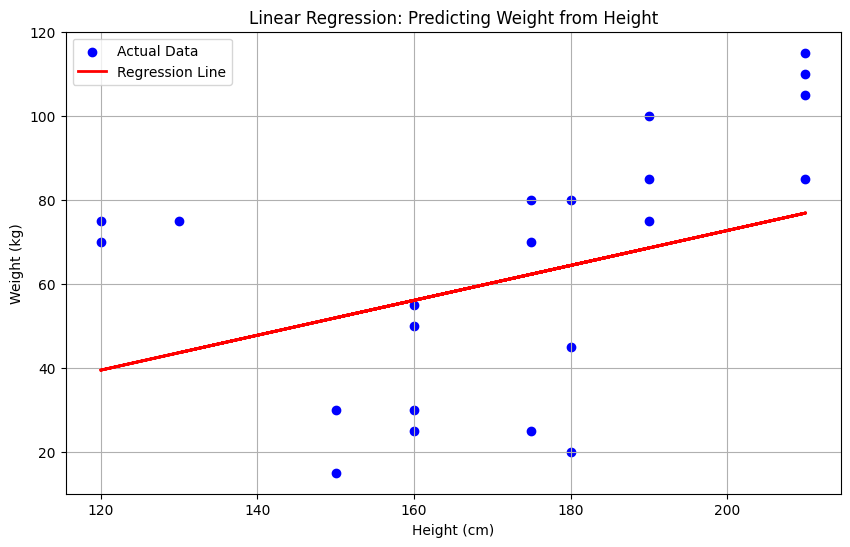

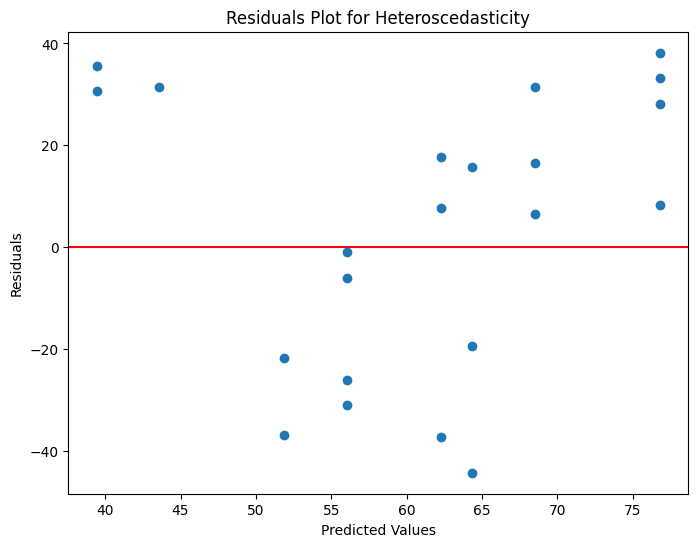

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Obesity Classification.csv')

# Display the first few rows and column names to understand the dataset
print(df.head())
print(df.columns)

# Select relevant columns for Task 3: Height (in cm) and Weight (in kg)
data = df[['Height', 'Weight']]

# Check for missing values
print(data.isnull().sum())

# Split the data into training and testing sets
X = data[['Height']]
y = data['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Predicting Weight from Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.grid(True)
plt.show()

# Diagnose for heteroscedasticity
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.title('Residuals Plot for Heteroscedasticity')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Check for multicollinearity (if applicable)



Task 4: Multiple Regression Model
Objective: Extend the model to predict weight based on both height and age.

Height    0
Weight    0
Age       0
dtype: int64
Mean Squared Error (Multiple Regression): 481.25123517660745
R-squared (Multiple Regression): 0.4665011501935913


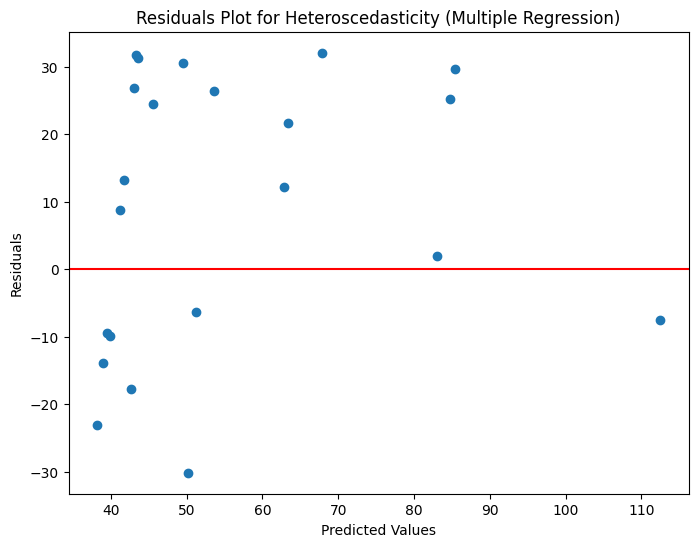

In [13]:
# Extend dataset to include 'Age' column
data_ext = df[['Height', 'Weight', 'Age']]

# Check for missing values
print(data_ext.isnull().sum())

# Split the data into training and testing sets
X_ext = data_ext[['Height', 'Age']]
y_ext = data_ext['Weight']
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_ext, y_ext, test_size=0.2, random_state=42)

# Build a multiple regression model
model_ext = LinearRegression()
model_ext.fit(X_train_ext, y_train_ext)

# Make predictions
y_pred_ext = model_ext.predict(X_test_ext)

# Evaluate the model
mse_ext = mean_squared_error(y_test_ext, y_pred_ext)
r2_ext = r2_score(y_test_ext, y_pred_ext)
print(f"Mean Squared Error (Multiple Regression): {mse_ext}")
print(f"R-squared (Multiple Regression): {r2_ext}")

# Diagnose for heteroscedasticity
residuals_ext = y_test_ext - y_pred_ext
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ext, residuals_ext)
plt.title('Residuals Plot for Heteroscedasticity (Multiple Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Check for multicollinearity (if applicable)



Task 5: Assumptions of Linear Regression Models
Objective: Identify and discuss two common assumptions of linear regression models and demonstrate a violation.

Mean Squared Error (Assumption Violation): 717.3981170200512
R-squared (Assumption Violation): 0.2047167003259165
Shapiro-Wilk Test Statistic: 0.9099998288256601, p-value: 0.047340568489383755


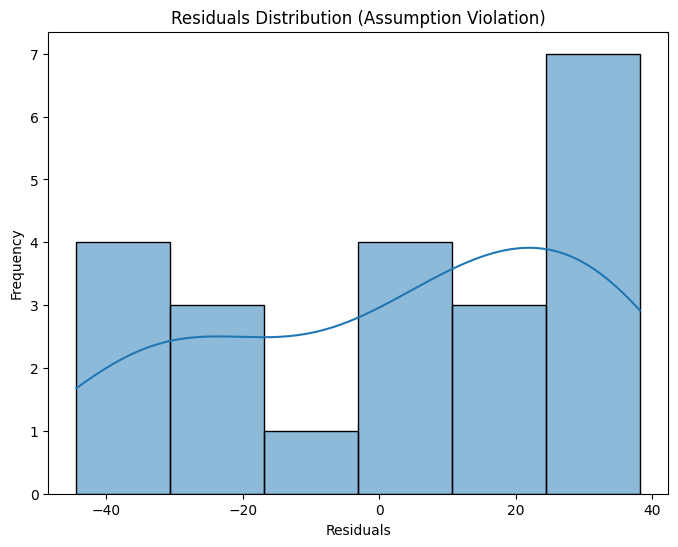

In [14]:
# Assuming normality of residuals as an example assumption

# Build a linear regression model
model_assumption = LinearRegression()
model_assumption.fit(X_train, y_train)  # Using the original dataset without 'Age'

# Make predictions
y_pred_assumption = model_assumption.predict(X_test)

# Evaluate the model
mse_assumption = mean_squared_error(y_test, y_pred_assumption)
r2_assumption = r2_score(y_test, y_pred_assumption)
print(f"Mean Squared Error (Assumption Violation): {mse_assumption}")
print(f"R-squared (Assumption Violation): {r2_assumption}")

# Diagnose for normality of residuals (Shapiro-Wilk test for example)
from scipy.stats import shapiro

residuals_assumption = y_test - y_pred_assumption
stat, p = shapiro(residuals_assumption)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

# Plotting the residuals distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals_assumption, kde=True)
plt.title('Residuals Distribution (Assumption Violation)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Proposed solution: Consider applying a transformation to the dependent variable or predictor variables



Task 6: Nonlinear Model
Objective: Propose a nonlinear model to predict the response variable and compare its performance with the linear regression model.

In [16]:
# Nonlinear Model (Polynomial Regression) example

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial regression
degree = 2  # Example degree
model_nonlinear = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_nonlinear.fit(X_train, y_train)

# Predictions
y_pred_nonlinear = model_nonlinear.predict(X_test)

# Evaluate the model
mse_nonlinear = mean_squared_error(y_test, y_pred_nonlinear)
r2_nonlinear = r2_score(y_test, y_pred_nonlinear)
print(f"Mean Squared Error (Nonlinear Model): {mse_nonlinear}")
print(f"R-squared (Nonlinear Model): {r2_nonlinear}")

# Compare with linear regression
print(f"R-squared (Linear Model): {r2}")
print(f"RMSE (Linear Model): {np.sqrt(mse)}")
print(f"R-squared (Nonlinear Model): {r2_nonlinear}")
print(f"RMSE (Nonlinear Model): {np.sqrt(mse_nonlinear)}")

# Visualize comparison if applicable


Mean Squared Error (Nonlinear Model): 419.2559762008457
R-squared (Nonlinear Model): 0.5352269984397404
R-squared (Linear Model): 0.2047167003259165
RMSE (Linear Model): 26.78428862262448
R-squared (Nonlinear Model): 0.5352269984397404
RMSE (Nonlinear Model): 20.475741163651335


Please find the video here:https://www.loom.com/share/b60b0e577c7149bfb9813c8a86e041a1?sid=87c6ed11-7e27-4d65-a9a8-5d2b95f07523